Tarea: Revisa los siguientes fragmentos de código y describe qué operaciones se realizan y cómo funcionan.



Importar librerias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

Crea un objeto tipo RandomState que luego va usar para metodos que impliquen algo aleatorio, para poder replicar resultados con la semilla 42

In [38]:
rand = np.random.RandomState(42)
N = 1000

Hace un numpy array de N renglones y 2 columnas

In [39]:
X = rand.rand(N, 2)

Grafica los puntos de X, considerando la columna 0 como x y la columna 1 como y, ademas le agrega el argumento s para cambiar el tamaño de los puntos

(0.0, 1.0)

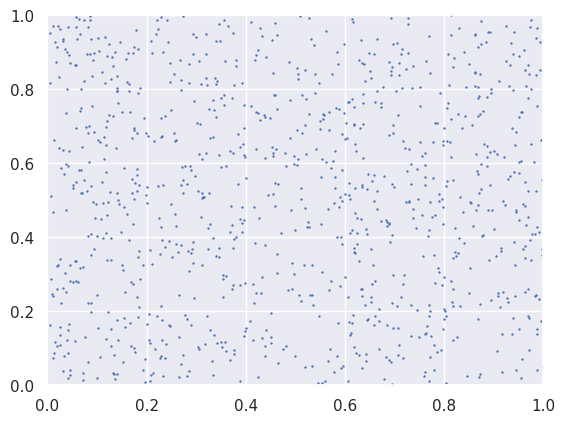

In [16]:
plt.scatter(X[:,0], X[:,1], s=(500/N))
ax = plt.gca()
ax.set_xlim((0,1))
ax.set_ylim((0,1))

1. se hace un reshape de X, cambiando las dimensiones de (N,2) a (N,1,2)
2. Un reshape de X de (N,2) a (1,N,2)
3. despues resta los arreglos obtenidos en 1 y 2, que dado a los reshapes escogidos, cada punto (m,k,0) representa la distancia en x del punto X[m] con el punto X[k] y cada punto (m, k, 1) representa la distancia en y de los mismos
4. la resta de esas dos matrices guarda todas las "distancias"  posibles entre cada componente de cada punto en X
5. Luego se elevan al cuadrado cada una de esas "distancias" cambiandolas a distancias  entre componentes al cuadrado
6. Suma a lo largo del eje 3 y regresa un arreglo de dimencion 2 donde cada elemento (n,m) es la suma de los elemenos (n,m,0) y (n,m,1) que por el punto 3 y 4 resulta ser la distancia al cuadrado del punto n y m (hablando de los puntos de la matriz X)
7. 

In [17]:
D = np.sum((X.reshape((N, 1, 2)) - X.reshape((1, N, 2))) ** 2, axis=-1)

In [18]:
vmc = np.argsort(D, axis=1)

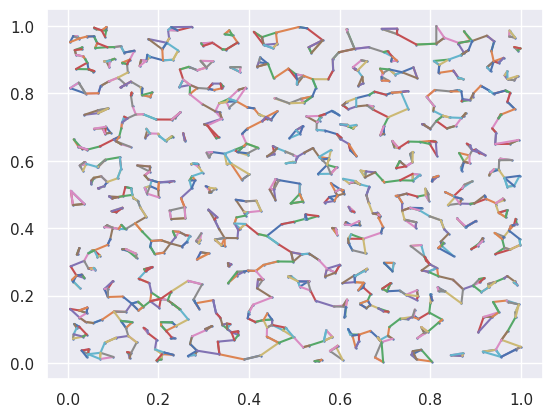

In [19]:
for i in range(X.shape[0]):
    for j in vmc[i, :3]:
        plt.plot(*zip(X[j], X[i]))
plt.scatter(X[:,0], X[:,1], s=(500/N));

In [46]:
A = np.array([0, 1, 2]).reshape(3,1)
A.shape

(3, 1)

In [49]:
B = np.array([0, 2, 2]).reshape((1,3))
B.shape

(1, 3)

In [50]:
A + B

array([[0, 2, 2],
       [1, 3, 3],
       [2, 4, 4]])